In [1]:
# Section 1: Import AI/ML libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
import joblib
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Section 2: Load and explore data
df = pd.read_csv('Mall_Customers.csv')
print("Dataset loaded:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset info:")
print(df.info())

Dataset loaded:
Shape: (200, 5)
Columns: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Sp

In [3]:
features = ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

In [4]:
# Let's say this is your X
X = df.drop('CustomerID', axis=1)  # Drop ID column if present

# Convert categorical features to numeric (e.g., Gender)
X_encoded = pd.get_dummies(X, drop_first=True)

# Now apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [5]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

In [6]:
# Section 3: Advanced data preprocessing for ML
def preprocess_for_ml(df):
    """Advanced preprocessing for machine learning"""
    df_processed = df.copy()
    
    # Handle categorical variables with Label Encoding
    label_encoders = {}
    for column in df_processed.columns:
        if df_processed[column].dtype == 'object':
            if column.upper() not in ['CUSTOMERID', 'ID']:
                le = LabelEncoder()
                df_processed[column + '_encoded'] = le.fit_transform(df_processed[column])
                label_encoders[column] = le
                print(f"Encoded {column}: {dict(zip(le.classes_, le.transform(le.classes_)))}")
    
    # Select features for training (exclude IDs)
    feature_columns = []
    for col in df_processed.columns:
        if df_processed[col].dtype in ['int64', 'float64']:
            if not any(id_word in col.upper() for id_word in ['ID', 'CUSTOMERID']):
                feature_columns.append(col)
    
    X = df_processed[feature_columns]
    
    print(f"Selected features for ML training: {feature_columns}")
    print(f"Training data shape: {X.shape}")
    
    return X, feature_columns, label_encoders

X, feature_names, encoders = preprocess_for_ml(df)

Encoded Gender: {'Female': np.int64(0), 'Male': np.int64(1)}
Selected features for ML training: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_encoded']
Training data shape: (200, 4)


In [7]:
# Section 3: Advanced data preprocessing for ML
def preprocess_for_ml(df):
    """Advanced preprocessing for machine learning"""
    df_processed = df.copy()
    
    # Handle categorical variables with Label Encoding
    label_encoders = {}
    for column in df_processed.columns:
        if df_processed[column].dtype == 'object':
            if column.upper() not in ['CUSTOMERID', 'ID']:
                le = LabelEncoder()
                df_processed[column + '_encoded'] = le.fit_transform(df_processed[column])
                label_encoders[column] = le
                print(f"Encoded {column}: {dict(zip(le.classes_, le.transform(le.classes_)))}")
    
    # Select features for training (exclude IDs)
    feature_columns = []
    for col in df_processed.columns:
        if df_processed[col].dtype in ['int64', 'float64']:
            if not any(id_word in col.upper() for id_word in ['ID', 'CUSTOMERID']):
                feature_columns.append(col)
    
    X = df_processed[feature_columns]
    
    print(f"Selected features for ML training: {feature_columns}")
    print(f"Training data shape: {X.shape}")
    
    return X, feature_columns, label_encoders

X, feature_names, encoders = preprocess_for_ml(df)

Encoded Gender: {'Female': np.int64(0), 'Male': np.int64(1)}
Selected features for ML training: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_encoded']
Training data shape: (200, 4)


Training models to find optimal clusters...
k=2: Silhouette Score = 0.252
k=3: Silhouette Score = 0.260
k=4: Silhouette Score = 0.298
k=5: Silhouette Score = 0.304
k=6: Silhouette Score = 0.331
k=7: Silhouette Score = 0.357
k=8: Silhouette Score = 0.388
k=9: Silhouette Score = 0.403
k=10: Silhouette Score = 0.421


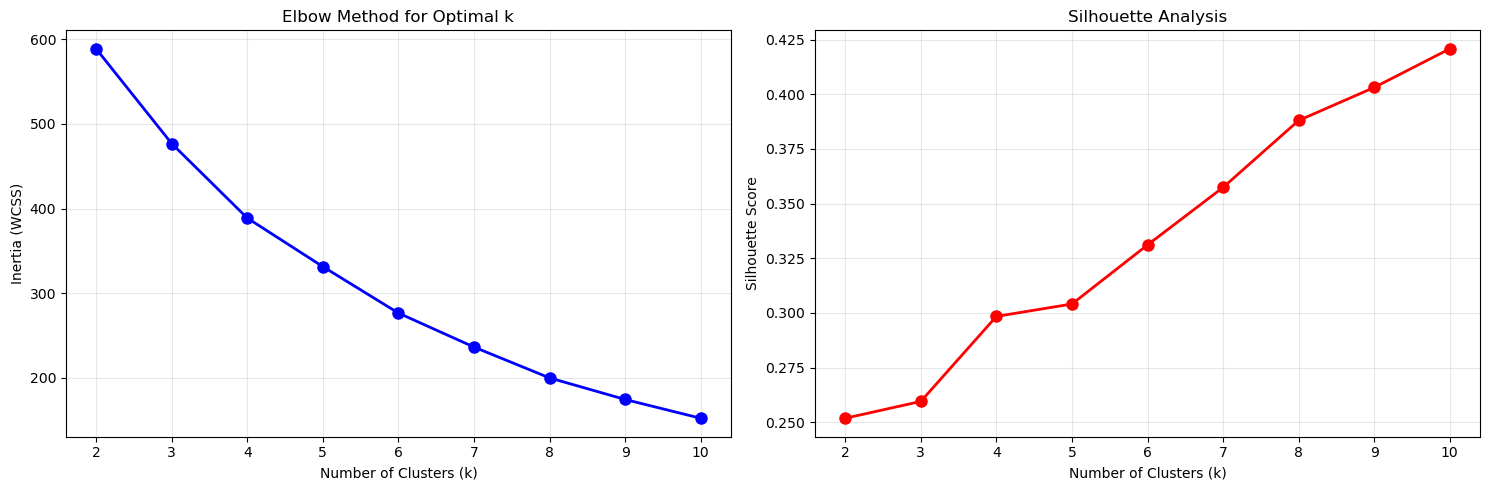


Optimal number of clusters: 10
Best silhouette score: 0.421


In [8]:
# Section 5: Find optimal number of clusters using ML techniques
def find_optimal_clusters_ml(X):
    """Find optimal clusters using multiple ML metrics"""
    max_k = min(10, len(X)//2)
    k_range = range(2, max_k + 1)
    
    inertias = []
    silhouette_scores = []
    
    print("Training models to find optimal clusters...")
    
    for k in k_range:
        # Train KMeans model
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X)
        
        # Calculate metrics
        inertias.append(kmeans.inertia_)
        sil_score = silhouette_score(X, cluster_labels)
        silhouette_scores.append(sil_score)
        
        print(f"k={k}: Silhouette Score = {sil_score:.3f}")
    
    # Plot evaluation metrics
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Elbow plot
    ax1.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
    ax1.set_xlabel('Number of Clusters (k)')
    ax1.set_ylabel('Inertia (WCSS)')
    ax1.set_title('Elbow Method for Optimal k')
    ax1.grid(True, alpha=0.3)
    
    # Silhouette plot
    ax2.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
    ax2.set_xlabel('Number of Clusters (k)')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Silhouette Analysis')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Find optimal k
    optimal_k = k_range[np.argmax(silhouette_scores)]
    best_silhouette = max(silhouette_scores)
    
    print(f"\nOptimal number of clusters: {optimal_k}")
    print(f"Best silhouette score: {best_silhouette:.3f}")
    
    return optimal_k, silhouette_scores

optimal_k, sil_scores = find_optimal_clusters_ml(X_scaled)


In [9]:
# Section 6: Train the final ML model
print(f"\nTraining final K-means model with k={optimal_k}...")

# Create and train the model
final_model = KMeans(
    n_clusters=optimal_k,
    random_state=42,
    n_init=10,
    max_iter=300,
    tol=1e-4
)

# Train the model
cluster_labels = final_model.fit_predict(X_scaled)

print("Model training completed!")
print(f"Model converged in {final_model.n_iter_} iterations")
print(f"Final inertia: {final_model.inertia_:.2f}")
print(f"Silhouette score: {silhouette_score(X_scaled, cluster_labels):.3f}")



Training final K-means model with k=10...
Model training completed!
Model converged in 6 iterations
Final inertia: 152.03
Silhouette score: 0.421


In [10]:
# Section 7: Model evaluation and validation
def evaluate_model(model, X, labels):
    """Comprehensive model evaluation"""
    print("\nModel Evaluation Results:")
    print("=" * 50)
    
    # Basic metrics
    inertia = model.inertia_
    sil_score = silhouette_score(X, labels)
    
    print(f"Inertia (WCSS): {inertia:.2f}")
    print(f"Silhouette Score: {sil_score:.3f}")
    print(f"Number of iterations: {model.n_iter_}")
    
    # Cluster sizes
    unique, counts = np.unique(labels, return_counts=True)
    print(f"\nCluster sizes:")
    for cluster_id, count in zip(unique, counts):
        percentage = (count / len(labels)) * 100
        print(f"  Cluster {cluster_id}: {count} samples ({percentage:.1f}%)")
    
    # Quality assessment
    if sil_score > 0.5:
        quality = "Excellent"
    elif sil_score > 0.3:
        quality = "Good"
    elif sil_score > 0.1:
        quality = "Fair"
    else:
        quality = "Poor"
    
    print(f"\nModel Quality: {quality}")
    
    return {
        'inertia': inertia,
        'silhouette_score': sil_score,
        'quality': quality,
        'cluster_sizes': dict(zip(unique, counts))
    }

evaluation_results = evaluate_model(final_model, X_scaled, cluster_labels)


Model Evaluation Results:
Inertia (WCSS): 152.03
Silhouette Score: 0.421
Number of iterations: 6

Cluster sizes:
  Cluster 0: 26 samples (13.0%)
  Cluster 1: 24 samples (12.0%)
  Cluster 2: 14 samples (7.0%)
  Cluster 3: 21 samples (10.5%)
  Cluster 4: 26 samples (13.0%)
  Cluster 5: 19 samples (9.5%)
  Cluster 6: 25 samples (12.5%)
  Cluster 7: 18 samples (9.0%)
  Cluster 8: 13 samples (6.5%)
  Cluster 9: 14 samples (7.0%)

Model Quality: Good


In [11]:
# Section 8: Add predictions to dataset
df['Cluster'] = cluster_labels
df['Cluster_Confidence'] = np.max(
    final_model.transform(X_scaled), axis=1
) / np.sum(final_model.transform(X_scaled), axis=1)

print("\nPredictions added to dataset")
print("New columns: 'Cluster', 'Cluster_Confidence'")


Predictions added to dataset
New columns: 'Cluster', 'Cluster_Confidence'


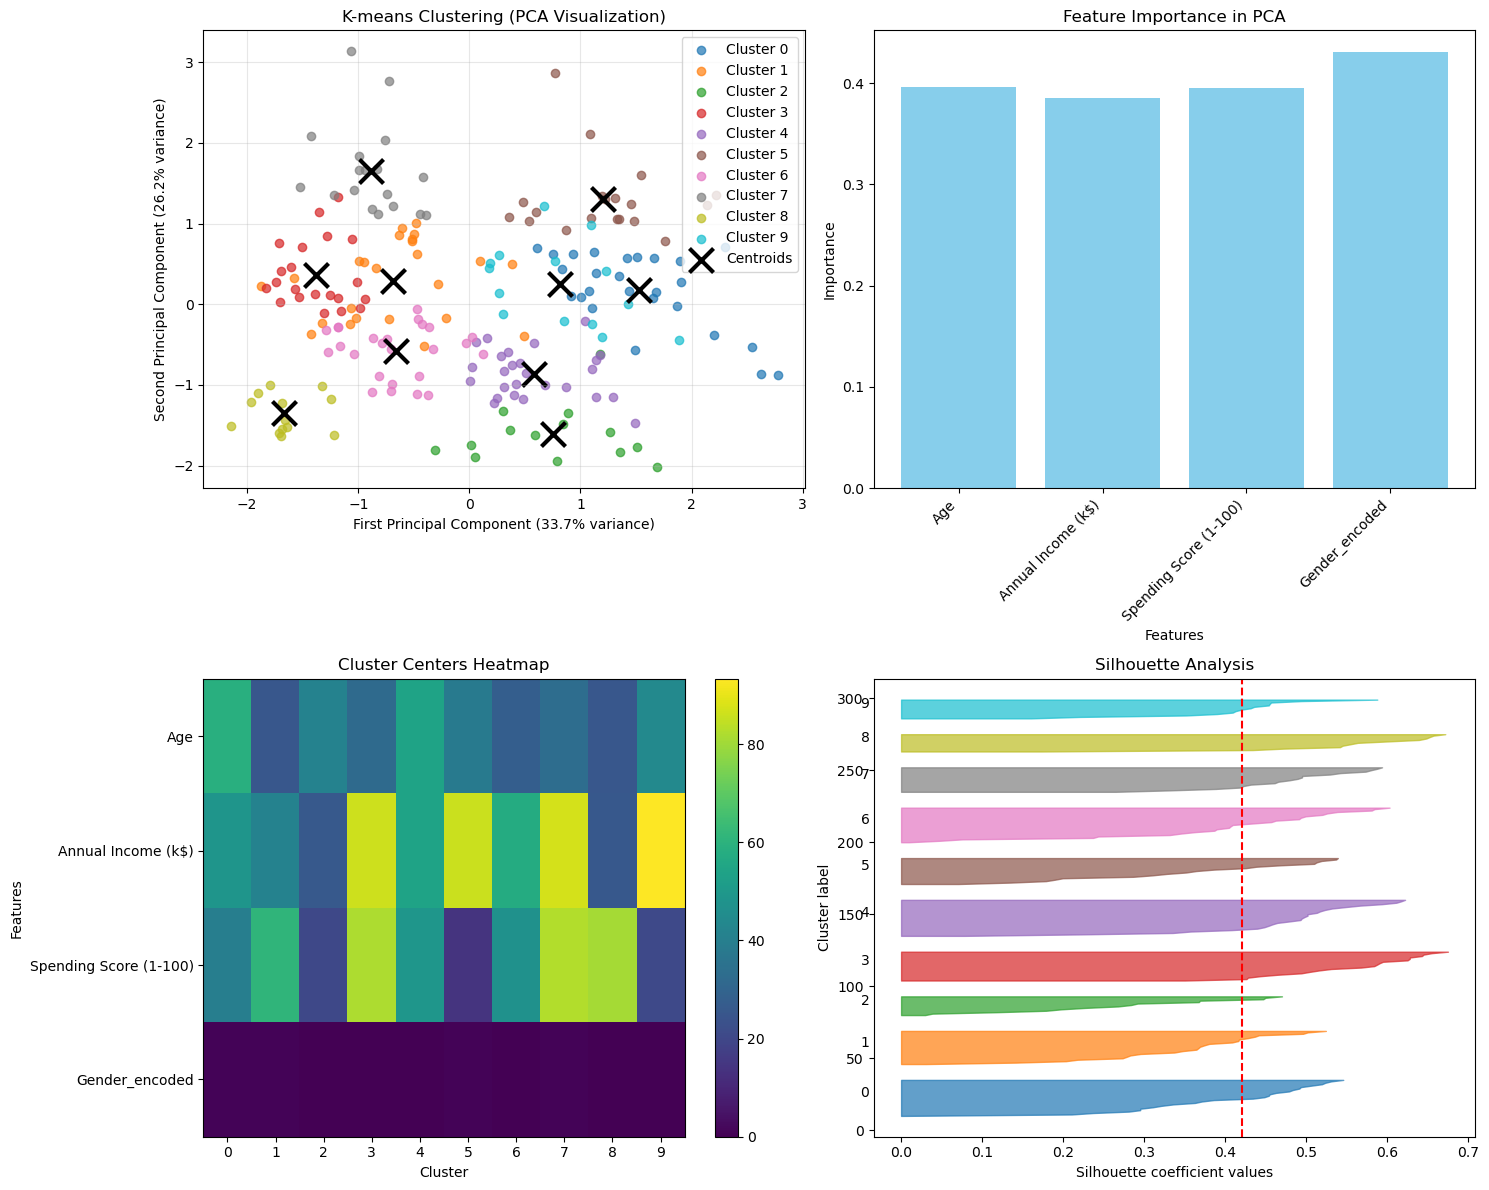

PCA explained variance: 59.9%


In [12]:
# Section 9: Advanced visualizations with PCA
def create_ml_visualizations(X_scaled, labels, model, feature_names):
    """Create advanced ML visualizations"""
    
    # PCA for dimensionality reduction
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    import matplotlib.cm as cm
    colors = cm.tab10(np.linspace(0, 1, optimal_k))  # dynamically generate enough colors
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # PCA visualization
    ax1 = axes[0, 0]
    for i in range(optimal_k):
        cluster_data = X_pca[labels == i]
        ax1.scatter(cluster_data[:, 0], cluster_data[:, 1], 
                    color=colors[i], label=f'Cluster {i}', alpha=0.7)

    
    # Plot centroids in PCA space
    centroids_pca = pca.transform(model.cluster_centers_)
    ax1.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
               c='black', marker='x', s=300, linewidth=3, label='Centroids')
    
    ax1.set_xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.1%} variance)')
    ax1.set_ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.1%} variance)')
    ax1.set_title('K-means Clustering (PCA Visualization)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Feature importance in PCA
    ax2 = axes[0, 1]
    feature_importance = np.abs(pca.components_).mean(axis=0)
    bars = ax2.bar(range(len(feature_names)), feature_importance, color='skyblue')
    ax2.set_xlabel('Features')
    ax2.set_ylabel('Importance')
    ax2.set_title('Feature Importance in PCA')
    ax2.set_xticks(range(len(feature_names)))
    ax2.set_xticklabels(feature_names, rotation=45, ha='right')
    
    # Cluster centers heatmap
    ax3 = axes[1, 0]
    centroids_original = scaler.inverse_transform(model.cluster_centers_)
    im = ax3.imshow(centroids_original.T, cmap='viridis', aspect='auto')
    ax3.set_xlabel('Cluster')
    ax3.set_ylabel('Features')
    ax3.set_title('Cluster Centers Heatmap')
    ax3.set_xticks(range(optimal_k))
    ax3.set_yticks(range(len(feature_names)))
    ax3.set_yticklabels(feature_names)
    plt.colorbar(im, ax=ax3)
    
    # Silhouette analysis
    ax4 = axes[1, 1]
    from sklearn.metrics import silhouette_samples
    sample_silhouette_values = silhouette_samples(X_scaled, labels)
    
    y_lower = 10
    for i in range(optimal_k):
        cluster_silhouette_values = sample_silhouette_values[labels == i]
        cluster_silhouette_values.sort()
        
        size_cluster_i = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = colors[i]
        ax4.fill_betweenx(np.arange(y_lower, y_upper),
                         0, cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
        
        ax4.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    
    ax4.set_xlabel('Silhouette coefficient values')
    ax4.set_ylabel('Cluster label')
    ax4.set_title('Silhouette Analysis')
    
    # Add average silhouette score line
    ax4.axvline(x=silhouette_score(X_scaled, labels), color="red", linestyle="--")
    
    plt.tight_layout()
    plt.show()
    
    print(f"PCA explained variance: {pca.explained_variance_ratio_.sum():.1%}")

create_ml_visualizations(X_scaled, cluster_labels, final_model, feature_names)


In [13]:
# Section 10: Save the trained model
def save_ml_model(model, scaler, encoders, feature_names, evaluation_results):
    """Save the complete ML pipeline"""
    model_data = {
        'model': model,
        'scaler': scaler,
        'encoders': encoders,
        'feature_names': feature_names,
        'evaluation_results': evaluation_results,
        'optimal_k': optimal_k
    }
    
    # Save model
    joblib.dump(model_data, 'customer_segmentation_model.pkl')
    
    # Save predictions
    df.to_csv('customer_predictions_ml.csv', index=False)
    
    print("✅ ML Model saved successfully!")
    print("📄 Files created:")
    print("- customer_segmentation_model.pkl (trained model)")
    print("- customer_predictions_ml.csv (predictions)")

save_ml_model(final_model, scaler, encoders, feature_names, evaluation_results)

✅ ML Model saved successfully!
📄 Files created:
- customer_segmentation_model.pkl (trained model)
- customer_predictions_ml.csv (predictions)


In [14]:
# Section 11: Model prediction function
def predict_new_customer(model_data, new_customer_data):
    """Predict cluster for new customer data"""
    model = model_data['model']
    scaler = model_data['scaler']
    feature_names = model_data['feature_names']
    
    # Ensure input is in correct feature order
    new_customer_scaled = scaler.transform([new_customer_data])
    
    # Predict
    cluster = model.predict(new_customer_scaled)[0]
    distances = model.transform(new_customer_scaled)[0]
    confidence = max(distances) / sum(distances)
    
    return {
        'predicted_cluster': cluster,
        'confidence': confidence,
        'cluster_distances': distances
    }


In [15]:
print("\n🎉 Complete AI/ML K-means model training finished!")
print(f"✅ Model trained with {len(df)} customers")
print(f"✅ {optimal_k} clusters identified")
print(f"✅ Model quality: {evaluation_results['quality']}")
print(f"✅ Files saved for future use")


🎉 Complete AI/ML K-means model training finished!
✅ Model trained with 200 customers
✅ 10 clusters identified
✅ Model quality: Good
✅ Files saved for future use
